In [1]:
cd C://Nikhil/Data Programming/practice

C:\Nikhil\Data Programming\practice


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset= pd.read_csv('stock.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           225 non-null    object
 1   close          225 non-null    int64 
 2   open           225 non-null    int64 
 3   high           225 non-null    int64 
 4   low            225 non-null    int64 
 5   No. of trades  225 non-null    object
dtypes: int64(4), object(2)
memory usage: 10.7+ KB


,Date,close,open,high,low,No. of trades
0,1/1/2021,187,185,187,185,"110,094"
1,1/4/2021,191,192,193,189,"253,278"
2,1/5/2021,193,187,194,185,"299,902"
3,1/6/2021,195,194,198,191,"302,100"
4,1/7/2021,197,197,200,195,"232,249"


In [4]:
training_set = dataset.iloc[:, 1:2].values

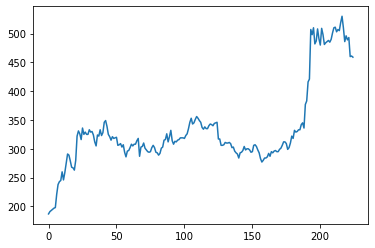

In [7]:
import matplotlib.pyplot as plt
plt.plot(training_set)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled

array([[0.        ],
       [0.01166181],
       [0.01749271],
       [0.02332362],
       [0.02915452],
       [0.03206997],
       [0.09912536],
       [0.14868805],
       [0.16326531],
       [0.16909621],
       [0.21282799],
       [0.17201166],
       [0.20991254],
       [0.25655977],
       [0.303207  ],
       [0.29737609],
       [0.26822157],
       [0.2361516 ],
       [0.23323615],
       [0.22157434],
       [0.27113703],
       [0.39358601],
       [0.41982507],
       [0.40524781],
       [0.37609329],
       [0.43440233],
       [0.40233236],
       [0.41399417],
       [0.40233236],
       [0.40233236],
       [0.42565598],
       [0.41399417],
       [0.41690962],
       [0.39941691],
       [0.36443149],
       [0.34402332],
       [0.39941691],
       [0.39358601],
       [0.42565598],
       [0.39650146],
       [0.41107872],
       [0.46355685],
       [0.47230321],
       [0.44314869],
       [0.40233236],
       [0.39067055],
       [0.37317784],
       [0.390

In [43]:
X_train = []
y_train = []
for i in range(30, 225):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [46]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [47]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [48]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [49]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [50]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [51]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
7/7 [==============================] - 16s 146ms/step - loss: 0.1039
Epoch 2/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0315
Epoch 3/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0231
Epoch 4/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0225
Epoch 5/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0207
Epoch 6/100
7/7 [==============================] - 1s 106ms/step - loss: 0.0197
Epoch 7/100
7/7 [==============================] - 1s 104ms/step - loss: 0.0161
Epoch 8/100
7/7 [==============================] - 1s 131ms/step - loss: 0.0151
Epoch 9/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0159
Epoch 10/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0139
Epoch 11/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0170
Epoch 12/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0128
Epoch 13/100
7/7 [==================

In [53]:
# Getting the real stock price
dataset_test = pd.read_csv('stock_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

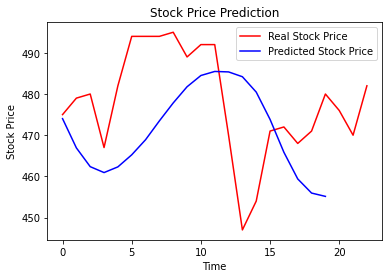

In [54]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 50):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()